In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from math import ceil
import matplotlib.pyplot as plt

In [15]:
#1. initialize the example data

# Set a random seed for reproducibility
np.random.seed(72)

# Generate 300 data points
m = 300

# Generate features with some randomness
sq_ft = np.random.uniform(800, 3500, m)
bedrooms = np.random.randint(2, 6, m)
floors = np.random.randint(1, 4, m)
age = np.random.uniform(5, 70, m)

# Create the feature matrix X
X = np.stack([sq_ft, bedrooms, floors, age], axis=1)

# Generate a target vector y with some linear relationship and added noise
# Formula: price = 0.15*sq_ft + 15*bedrooms + 10*floors - 3*age + b + noise
true_w = np.array([0.15, 15, 10, -3])
true_b = 50
noise = np.random.normal(0, 10, m) # Added Gaussian noise for realism

y = X @ true_w + true_b + noise

# Print the shapes to confirm
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")


# Split the data into training and testing sets
# test_size=30: specifies that 30 samples should be used for the test set
# random_state=36: ensures the same random split every time
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=30, random_state=72)

# Print the shapes to verify the split
print("Shapes after splitting:")
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

Shape of X: (300, 4)
Shape of y: (300,)
Shapes after splitting:
x_train shape: (270, 4)
y_train shape: (270,)
x_test shape: (30, 4)
y_test shape: (30,)


In [16]:
#2. normalize the dataset
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.transform(x_test)
print(f"Peak to peak range in orginal training dateset x_train is: {np.ptp(x_train, axis = 0)}")
print(f"Peak to peak range in normalized training dateset x_train_norm is: {np.ptp(x_train_norm, axis = 0)}")

print(f"Peak to peak range in orginal test dateset x_test is: {np.ptp(x_test, axis = 0)}")
print(f"Peak to peak range in normalized test dateset x_test_norm is: {np.ptp(x_test_norm, axis = 0)}")

Peak to peak range in orginal training dateset x_train is: [2.67978923e+03 3.00000000e+00 2.00000000e+00 6.46634480e+01]
Peak to peak range in normalized training dateset x_train_norm is: [3.42835561 2.71183739 2.56724057 3.4631064 ]
Peak to peak range in orginal test dateset x_test is: [2.44670620e+03 3.00000000e+00 2.00000000e+00 6.22371134e+01]
Peak to peak range in normalized test dateset x_test_norm is: [3.13016368 2.71183739 2.56724057 3.33316197]


In [17]:
#3. train the model
sgdr = SGDRegressor(max_iter = 1000)
sgdr.fit(x_train_norm, y_train)
print(sgdr.get_params())
print(f"number of iterations: {sgdr.n_iter_}, number of weight updated: {sgdr.t_}")

{'alpha': 0.0001, 'average': False, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.01, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'invscaling', 'loss': 'squared_error', 'max_iter': 1000, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.25, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
number of iterations: 37, number of weight updated: 9991.0


In [18]:
#4. view parameters
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                       w: {w_norm}, b:{b_norm}")
print("model parameters built from scrath are: w: [118.6113452   16.18415635   7.81144096 -55.69931479], b: 334.3965068791059")

model parameters:                       w: [118.58042608  16.18117783   7.80958317 -55.75483046], b:[334.41148526]
model parameters built from scrath are: w: [118.6113452   16.18415635   7.81144096 -55.69931479], b: 334.3965068791059


In [33]:
#6. visualize the prediction from the training dataset
y_train_pred_sgd = sgdr.predict(x_train_norm)
y_train_pred = x_train_norm @ w_norm + b_norm
finalerrors_train =  y_train_pred_sgd - y_train
print(f"prediction by sgd and dot product match: {(y_train_pred_sgd == y_train_pred).all()}")

prediction by sgd and dot product match: True


<function matplotlib.pyplot.show(close=None, block=None)>

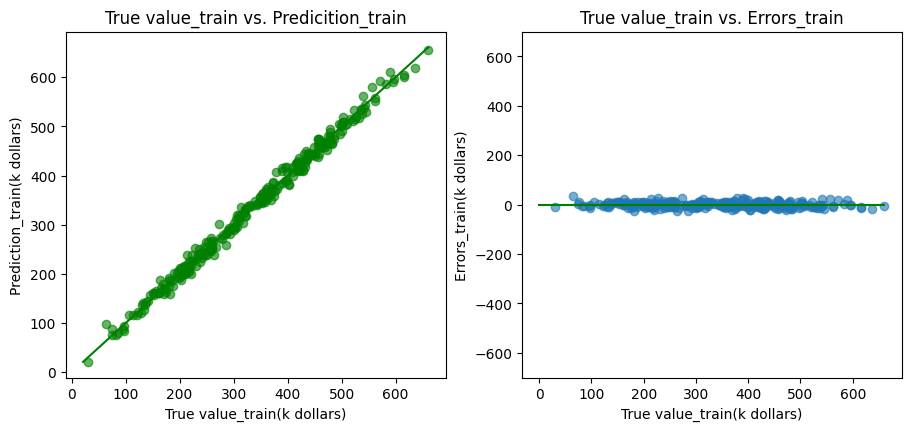

In [34]:
#8. plot the cost curve to monitor the training
fig, ax = plt.subplots(1, 2, constrained_layout = True, figsize = (9, 4.2))

ax[0].scatter(y_train, y_train_pred_sgd, alpha = 0.6, c = "g")
ax[0].set_title("True value_train vs. Predicition_train")
ax[0].set_xlabel("True value_train(k dollars)")
ax[0].set_ylabel("Prediction_train(k dollars)")
min_val = min(y_train.min(), y_train_pred_sgd.min())
max_val = max(y_train.max(), y_train_pred_sgd.max())
ax[0].plot([min_val, max_val], [min_val, max_val], 'g-')


ax[1].scatter(y_train, finalerrors_train, alpha = 0.6)
ax[1].set_title("True value_train vs. Errors_train")
ax[1].set_xlabel("True value_train(k dollars)")
ax[1].set_ylabel("Errors_train(k dollars)")
ax[1].set_ylim(-700, 700)
ax[1].plot([0, y_train.max()], [0, 0], 'g-')


plt.show



In [35]:
#10. evaluate MSE and R squre for training dataset
mse_train = mean_squared_error(y_train, y_train_pred_sgd)
print(f"Train MSE: {mse_train}")
r2_train = r2_score(y_train, y_train_pred_sgd)
print(f"Train R-squared: {r2_train}")

Train MSE: 118.2145742909349
Train R-squared: 0.9934419352611452


In [31]:
#6. test the model
y_test_pred_sgd = sgdr.predict(x_test_norm)
finalerrors_test =  y_test_pred_sgd - y_test

<function matplotlib.pyplot.show(close=None, block=None)>

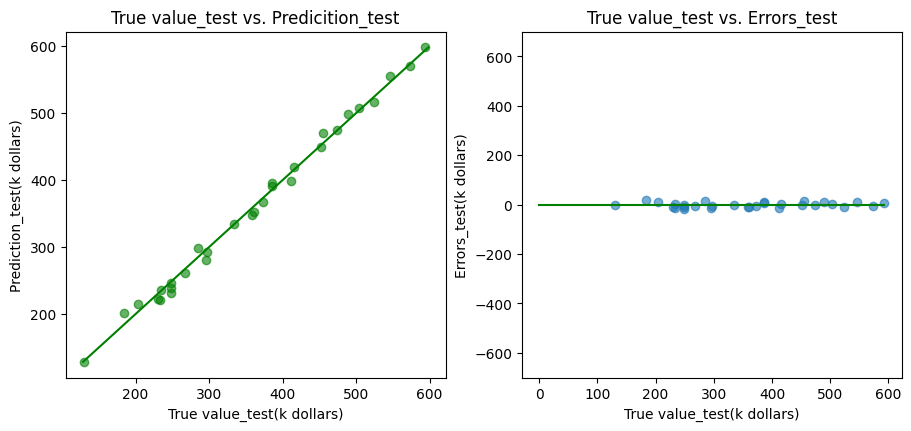

In [42]:
fig, ax = plt.subplots(1, 2, constrained_layout = True, figsize = (9, 4.2))


ax[0].scatter(y_test, y_test_pred_sgd, alpha = 0.6, c = "g")
ax[0].set_title("True value_test vs. Predicition_test")
ax[0].set_xlabel("True value_test(k dollars)")
ax[0].set_ylabel("Prediction_test(k dollars)")
min_val = min(y_test.min(), y_test_pred_sgd.min())
max_val = max(y_test.max(), y_test_pred_sgd.max())
ax[0].plot([min_val, max_val], [min_val, max_val], 'g-')


ax[1].scatter(y_test, finalerrors_test, alpha = 0.6)
ax[1].set_title("True value_test vs. Errors_test")
ax[1].set_xlabel("True value_test(k dollars)")
ax[1].set_ylabel("Errors_test(k dollars)")
ax[1].set_ylim(-700, 700)
ax[1].plot([0, y_test.max()], [0, 0], 'g-')


plt.show

In [41]:
#10. evaluate MSE and R squre for test dataset
mse_test = mean_squared_error(y_test, y_test_pred_sgd)
print(f"Test MSE: {mse_test}")
r2_test = r2_score(y_test, y_test_pred_sgd)
print(f"Test R-squared: {r2_test}")

Test MSE: 85.85410423445497
Test R-squared: 0.9943317093646002
